In [95]:
%pip install numpy matplotlib sympy sklearn

Note: you may need to restart the kernel to use updated packages.


In [96]:
import matplotlib.pyplot as plt
from PIL import Image
from nn2 import NeuNet, sigmoid, LayerModel, tanh
from numpy import array, ndarray
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [97]:
def hot_encode(y: ndarray | list, n_class: int = 10) -> ndarray:
    return array([[0.]*(num)+[1.]+[0.]*(n_class-num-1) for num in y])


In [98]:
MAX_NUM = 6
MIN_NUM = 1

(data, target) = load_digits(n_class=10, return_X_y=True)
assert(isinstance(target, ndarray))
target = hot_encode(target)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [99]:
h1 = LayerModel(20)
h1.activation(sigmoid)
h2 = LayerModel(10)
h2.activation(sigmoid)
nn = NeuNet(64)
nn.add_layer(h1)
nn.add_layer(h2)

In [100]:
nn.fit(x_train, y_train, learning_rate=4, passes=2000, batch_size=30)

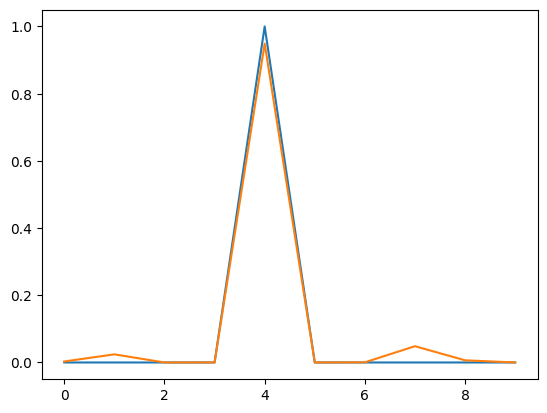

In [101]:
n=0
y = nn.predict(x_train[n])
plt.plot(y_train[n])
plt.plot(y)
plt.show()

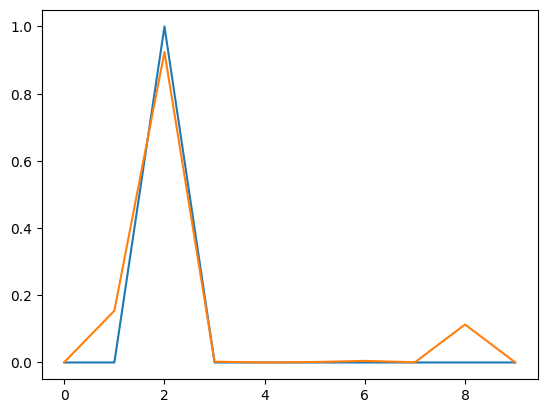

In [102]:
n=0
y = nn.predict(x_test[n])
plt.plot(y_test[n])
plt.plot(y)
plt.show()

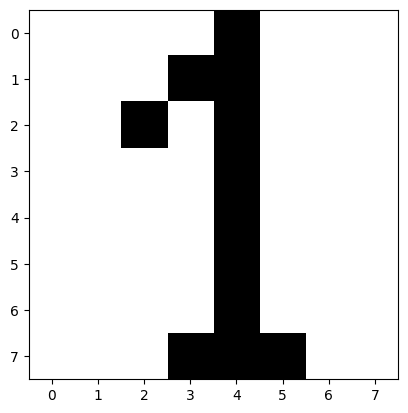

In [103]:
nums_test1 = {i: Image.open(f"font/{i}.bmp") for i in range(MIN_NUM, MAX_NUM+1)}

plt.imshow(nums_test1[1], cmap='gray')   # type: ignore
plt.show()

In [104]:
x_test1 = array([
    num_img.getdata() for num_img in nums_test1.values()
])/255
y_test1 = hot_encode(list(nums_test1.keys()))

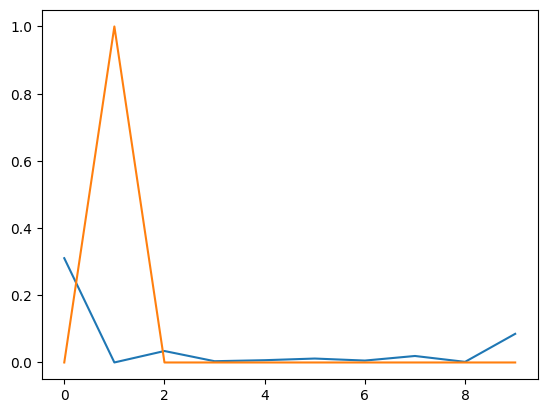

In [105]:
n = 0
y = nn.predict(x_test1[n])
plt.plot(y)
plt.plot(y_test1[n])
plt.show()

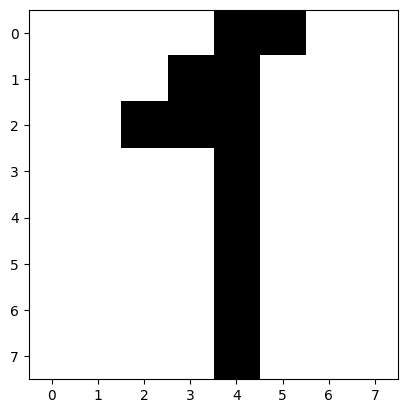

In [106]:
nums_test2 = {i: Image.open(f"font/{i}t.bmp") for i in range(MIN_NUM, MAX_NUM+1)}
plt.imshow(nums_test2[1], cmap='gray')   # type: ignore
plt.show()

In [107]:
x_test2 = array([
    num_img.getdata() for num_img in nums_test2.values()
])/255
y_test2 = hot_encode(list(nums_test2.keys()))

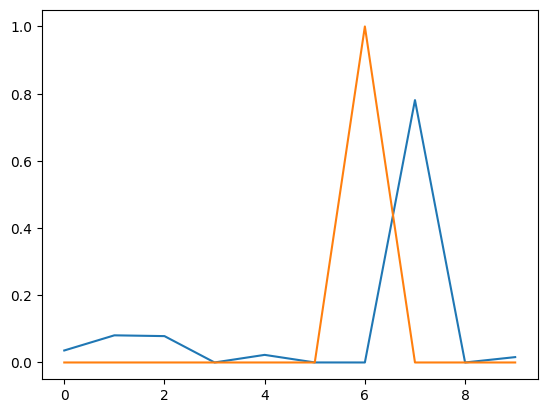

In [108]:
n=5
y = nn.predict(x_test2[n])
plt.plot(y)
plt.plot(y_test2[n])
plt.show()